In [1]:
import os
import sys
sys.path.append(os.getcwd() + '/../vic3analyze')

In [2]:
from database import get_db
from sqlalchemy.orm import Session
from sqlalchemy.sql import text

db = get_db('vic3.db')

In [3]:
from tables.country_basics import CountryBasics
from tables.market_goods import MarketGoods
from tables.metadata import RunMetadata, SampleMetadata

from sqlalchemy import select
import pandas as pd

In [4]:
df = pd.read_sql(select(RunMetadata).join(SampleMetadata), db.connect())
df.groupby(['id']).size()

id
364f28b4-89af-48fd-9f6b-686a9e841990    130
379b73a6-3c8e-484e-b870-cdcc2309a4c5    130
57b18d62-9b90-4037-a065-fe41cf423fc4     99
5ee63852-7bf0-4ef3-a468-6bdbdd00ccaf    130
77cdfd1e-5ca8-4e94-8baf-3f88ea221001    127
8c410174-e899-48ca-b06b-f6c4ddb9e4e7    128
ac991cdc-26c3-42ab-9b52-33f36edd2a41    130
b6258773-cf38-4a0f-bde2-5aa87e87ba6a    132
f8f2f365-fbb4-4045-83e3-d0b0f497fb25    129
fbaf42d7-aeab-4b5f-b273-0075f7956548    123
dtype: int64

In [5]:



stmt = (
    select(CountryBasics)
    .where(CountryBasics.tag.in_(('GBR', 'FRA', 'PRU', 'RUS', 'AUS', 'USA', 'JAP')))
)
countries = pd.read_sql(stmt, db.connect())

In [6]:

stmt = (
    select(MarketGoods, CountryBasics)
    .join(MarketGoods.owner_country)
    .where(MarketGoods.good_id.in_(('steel', 'iron', 'coal', 'engines')))
    .where(CountryBasics.tag.in_(('GBR', 'FRA', 'PRU', 'RUS', 'AUS', 'USA')))
    #.where(CountryBasics.tag == 'GBR')
)
markets = pd.read_sql(stmt, db.connect())
#print(str(stmt))

,run_id,game_date,tag,buildings_demand,buildings_supply
0,57b18d62-9b90-4037-a065-fe41cf423fc4,1836-02-01,RUS,552.80000,518.00000
1,57b18d62-9b90-4037-a065-fe41cf423fc4,1836-02-01,GBR,1466.12081,1390.01184
2,57b18d62-9b90-4037-a065-fe41cf423fc4,1836-02-01,GBR,265.70000,342.40000
3,57b18d62-9b90-4037-a065-fe41cf423fc4,1836-02-01,GBR,1694.64234,1743.20000
4,57b18d62-9b90-4037-a065-fe41cf423fc4,1836-02-01,GBR,605.60000,708.50000
...,...,...,...,...,...
23939,ac991cdc-26c3-42ab-9b52-33f36edd2a41,1847-01-01,PRU,0.00000,0.00000
23940,ac991cdc-26c3-42ab-9b52-33f36edd2a41,1847-01-01,USA,664.30993,829.60000
23941,ac991cdc-26c3-42ab-9b52-33f36edd2a41,1847-01-01,USA,901.23648,836.39494
23942,ac991cdc-26c3-42ab-9b52-33f36edd2a41,1847-01-01,USA,353.41267,198.90000


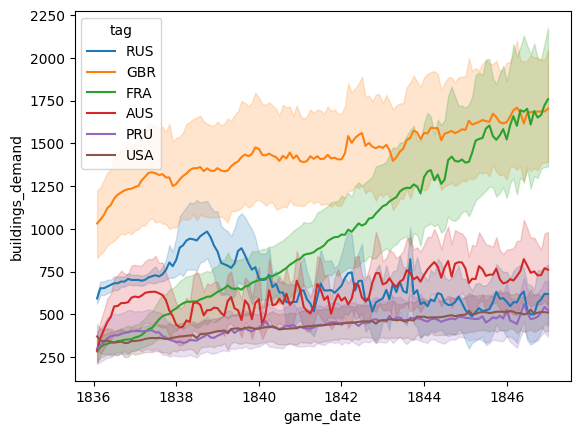

In [10]:
import seaborn
#mk2 = markets.groupby(['good_id', 'game_date', 'run_id']).sum(numeric_only=True)
#mk3 = mk2.groupby(['good_id', 'game_date']).mean()


#seaborn.lineplot(countries, x='game_date', y='prestige', hue='tag')
#eaborn.lineplot(mk_limited, x='game_date', y='buildings_supply', hue='tag', errorbar="ci")
#seaborn.lineplot(mk_limited, x='game_date', y='buildings_supply', hue='tag', errorbar="pi")
seaborn.lineplot(markets, x='game_date', y='buildings_demand', hue='tag', errorbar="ci")
#seaborn.lineplot(mk_limited, x='game_date', y='buildings_supply', hue='tag', errorbar="se")
#seaborn.lineplot(mk_limited, x='game_date', y='buildings_supply', hue='tag', errorbar="sd")
#seaborn.lineplot(mk_limited, x='game_date', y='buildings_supply', hue='tag', units='run_id', estimator=None)
mk_limited

population  agg_dmeand  \
run_id                               tag game_date                            
364f28b4-89af-48fd-9f6b-686a9e841990 AUS 1836-02-01    34700589  300.594335   
                                         1836-03-01    34701156  314.005740   
                                         1836-04-01    34712479  378.446295   
                                         1836-05-01    34719539  412.800580   
                                         1836-06-01    34719386  434.887235   
...                                                         ...         ...   
fbaf42d7-aeab-4b5f-b273-0075f7956548 USA 1846-09-01    17039488  302.879182   
                                         1846-10-01    17032768  298.309593   
                                         1846-11-01    17026104  299.630090   
                                         1846-12-01    17016111  277.900285   
                                         1847-01-01    17076866  282.944728   

                                                     agg_demand_per_cap  
run_id                               tag game_date                       
364f28b4-89af-48fd-9f6b-686a9e841990 AUS 1836-02-01            0.000009  
                                         1836-03-01            0.000009  
                                         1836-04-01            0.000011  
                                         1836-05-01            0.000012  
                                         1836-06-01            0.000013  
...                                                                 ...  
fbaf42d7-aeab-4b5f-b273-0075f7956548 USA 1846-09-01            0.000018  
                                         1846-10-01            0.000018  
                                         1846-11-01            0.000018  
                                         1846-12-01            0.000016  
                                         1847-01-01            0.000017  

[7548 rows x 3 columns]

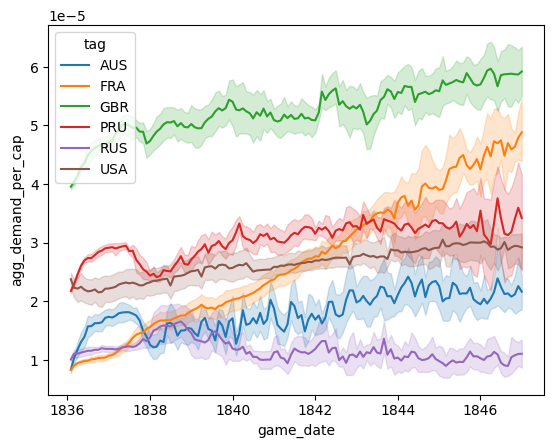

In [22]:
import numpy as np
mk_limited = markets[['run_id','game_date','tag','buildings_demand', 'population']]
mk_limited= mk_limited.groupby(['run_id', 'tag', 'game_date']
                              ).agg(population=('population', 'max'), agg_dmeand=('buildings_demand', np.mean))
mk_limited['agg_demand_per_cap'] = mk_limited['agg_dmeand']/mk_limited['population']
seaborn.lineplot(mk_limited, x='game_date', y='agg_demand_per_cap', hue='tag', errorbar="ci")
mk_limited

<AxesSubplot: xlabel='game_date', ylabel='gdp'>

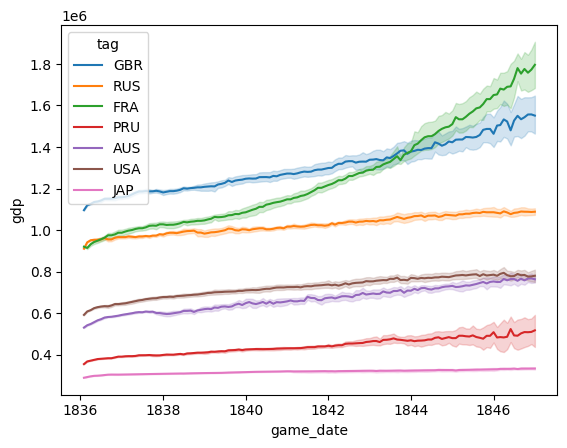

In [11]:

seaborn.lineplot(countries, x='game_date', y='gdp', hue='tag')

<AxesSubplot: xlabel='game_date', ylabel='per_capita_gdp'>

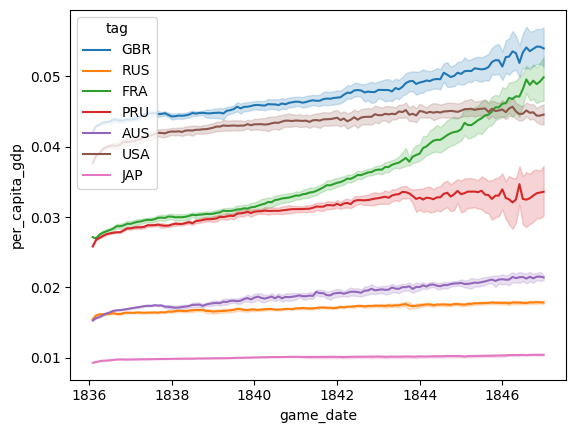

In [12]:

countries['per_capita_gdp'] = countries['gdp']/countries['population']
seaborn.lineplot(countries, x='game_date', y='per_capita_gdp', hue='tag')

<AxesSubplot: xlabel='game_date', ylabel='treasury'>

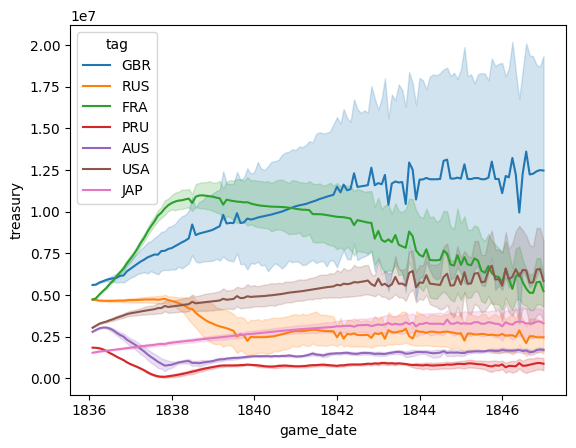

In [23]:

seaborn.lineplot(countries, x='game_date', y='treasury', hue='tag')

<AxesSubplot: xlabel='game_date', ylabel='investment_pool'>

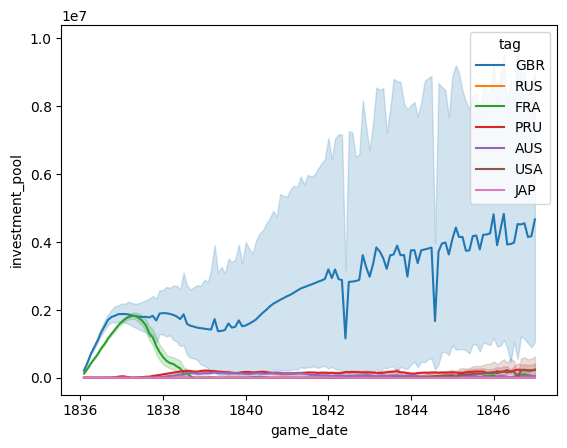

In [24]:

seaborn.lineplot(countries, x='game_date', y='investment_pool', hue='tag')